# Spherical harmonics

## $Y_{lm}(x, y, z)$

#### Code to compute the spherical harmonic $Y_{lm}(x,y,z)$

We begin by importing some stuff and defining our functions:

In [24]:
import numpy as np
from IPython.display import display, Math
import sympy
from sympy import *
from sympy.functions.special.tensor_functions import KroneckerDelta

# Initialize the session
init_session(quiet=True)

# I am using the dev version of sympy
print("Using sympy version", sympy.__version__)

# Define our symbols
x, y, z, mu, nu, l, m, j, k, p, q = symbols('x y z mu nu l m j k p q')


Using sympy version 1.1.2.dev


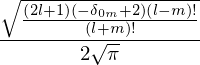

In [2]:
def A(l, m):
    """A spherical harmonic normalization constant."""
    return sqrt((2 - KroneckerDelta(m, 0)) * (2 * l + 1) * factorial(l - m) / (4 * pi * factorial(l + m)))

# Print it
A(l, m)

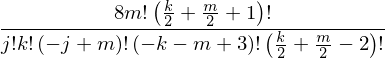

In [40]:
def B(l, m, j, k):
    """Another spherical harmonic normalization constant."""
    # NOTE: The factorial of a negative integer is +/- infinity. This can happen in the denominator
    # of the expression for `B`, so in that case `B = 0` exactly. Let's override the error `sympy`
    # throws because the value is undetermined and set the value of `B` to zero directly in this case.
    try: 
        ratio = factorial((l + m + k - 1) / 2) / factorial((-l + m + k - 1) / 2)
    except ValueError:
        ratio = 0
    return 2 ** l * factorial(m) / (factorial(j) * factorial(k) * factorial(m - j) * factorial(l - m - k)) * ratio

# Print it
B(l, m, j, k)

In [29]:
def Yxyz(l, m, x, y, z):
    """Return the spherical harmonic of degree `l` and order `m` as a function of `x`, `y`, and `z`."""
    res = 0
    if (m >= 0):
        for j in range(0, m + 1, 2):
            for k in range(0, l - m + 1):
                res += (-1) ** (j // 2) * A(l, m) * B(l, m, j, k) * x ** (m - j) * y ** j * z ** k
    else:
        for j in range(1, abs(m) + 1, 2):
            for k in range(0, l - abs(m) + 1):
                res += (-1) ** ((j - 1) // 2) * A(l, abs(m)) * B(l, abs(m), j, k) * x ** (abs(m) - j) * y ** j * z ** k
    return res

Let's compute and display the spherical harmonics up to and including degree $l = 3$:

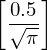

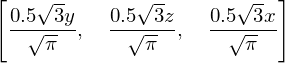

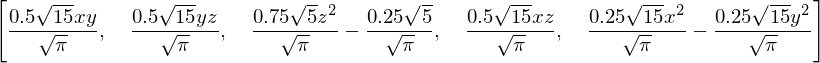

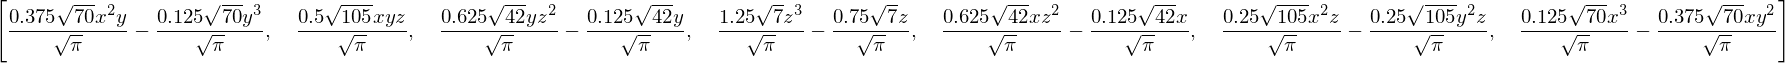

In [30]:
lmax = 3
for l in range(lmax + 1):
    display([Yxyz(l, m, x, y, z) for m in range(-l, l + 1)],)

From [Wikipedia](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics), the real spherical harmonics up to degree $l = 3$ on the unit sphere are:


$\frac{1}{2} \sqrt{\frac{1}{\pi}}$

$\sqrt{\frac{3}{4 \pi}} \cdot y, 
\sqrt{\frac{3}{4 \pi}} \cdot z,
\sqrt{\frac{3}{4 \pi}} \cdot x$

$\frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot x y,
\frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot y z,
\frac{1}{4} \sqrt{\frac{5}{\pi}} \cdot (- x^2 - y^2 + 2 z^2),
\frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot z x,
\frac{1}{4} \sqrt{\frac{15}{\pi}} \cdot (x^2 - y^2)$

$\frac{1}{4} \sqrt{\frac{35}{2 \pi}} \cdot \left( 3 x^2 - y^2 \right) y,
\frac{1}{2} \sqrt{\frac{105}{\pi}} \cdot xy z,
\frac{1}{4} \sqrt{\frac{21}{2 \pi}} \cdot y (4 z^2 - x^2 - y^2),
\frac{1}{4} \sqrt{\frac{7}{\pi}} \cdot z (2 z^2 - 3 x^2 - 3 y^2),
\frac{1}{4} \sqrt{\frac{21}{2 \pi}} \cdot x (4 z^2 - x^2 - y^2),
\frac{1}{4} \sqrt{\frac{105}{\pi}} \cdot \left( x^2 - y^2 \right) z,
\frac{1}{4} \sqrt{\frac{35}{2 \pi}} \cdot \left( x^2 - 3 y^2 \right) x$

Recalling that $z^2 = 1 - x^2 - y^2$, the expressions agree.

■

## $Y_{lm}(x, y)$

#### Code to compute the spherical harmonic $Y_{lm}(x,y)$ (expressions where powers of $z$ are reduced to powers of $x$ and $y$)

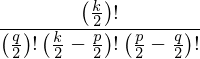

In [31]:
def C(p, q, k):
    """Return the binomial theorem coefficient `C`."""
    return factorial(k / 2) / (factorial(q / 2) * factorial((k - p) / 2) * factorial((p - q) / 2))

# Print it
C(p, q, k)

In [37]:
def Y(l, m, x, y):
    """Return the spherical harmonic of degree `l` and order `m`."""
    res = 0
    z = sqrt(1 - x ** 2 - y ** 2)
    if (m >= 0):
        for j in range(0, m + 1, 2):
            for k in range(0, l - m + 1, 2):
                for p in range(0, k + 1, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p) // 2) * A(l, m) * B(l, m, j, k) * C(p, q, k) * x ** (m - j + p - q) * y ** (j + q)
            for k in range(1, l - m + 1, 2):
                for p in range(0, k, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p) // 2) * A(l, m) * B(l, m, j, k) * C(p, q, k - 1) * x ** (m - j + p - q) * y ** (j + q) * z          
    else:
        for j in range(1, abs(m) + 1, 2):
            for k in range(0, l - abs(m) + 1, 2):
                for p in range(0, k + 1, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p - 1) // 2) * A(l, abs(m)) * B(l, abs(m), j, k) * C(p, q, k) * x ** (abs(m) - j + p - q) * y ** (j + q)
            for k in range(1, l - abs(m) + 1, 2):
                for p in range(0, k, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p - 1) // 2) * A(l, abs(m)) * B(l, abs(m), j, k) * C(p, q, k - 1) * x ** (abs(m) - j + p - q) * y ** (j + q) * z

    return res

Let's check that if we set $z^2 = 1 - x^2 - y^2$ our expressions $Y_{lm}(x, y, z)$ and $Y_{lm}(x, y)$ agree:

In [38]:
lmax = 3
z = sqrt(1 - x ** 2 - y ** 2)
for l in range(lmax + 1):
    display([simplify(Yxyz(l, m, x, y, z) - Y(l, m, x, y)) for m in range(-l, l + 1)])

■